In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Load the data
housing = pd.read_csv("E:/files/first term/dataset/housing.csv")
# Display the data
housing.shape

(20640, 10)

In [3]:
housing.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


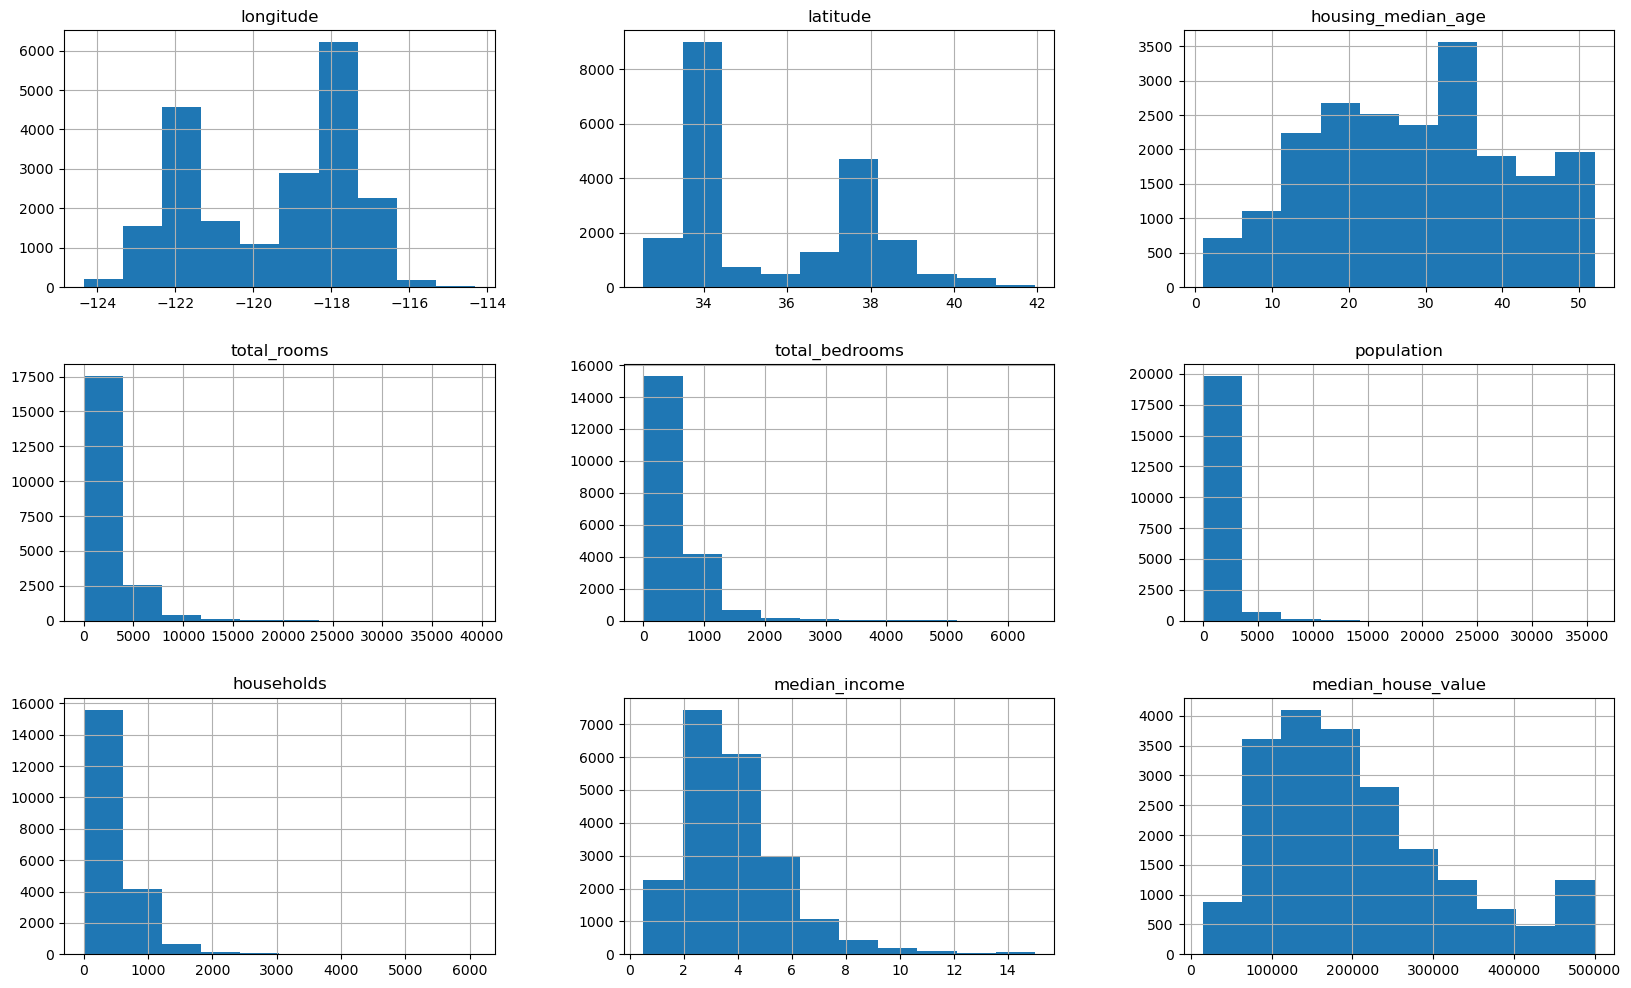

In [4]:
housing.hist(figsize=(20, 12))
plt.show()

In [5]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    #b = df[(df['a'] > 1) & (df['a'] < 5)]
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(housing[column].size,len(data[column])))
    #remove the outliers from the dataframe
    outlierRemoved = housing[~housing[column].isin(data[column])]
    return outlierRemoved

In [6]:
housing = getOutliers(housing,"total_rooms")

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 1287


C:\Users\bebo\AppData\Local\Temp\ipykernel_8044\3058796633.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = des[desPairs['25']]
C:\Users\bebo\AppData\Local\Temp\ipykernel_8044\3058796633.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = des[desPairs['75']]


In [7]:
# Check for missing values
print(housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        196
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [8]:
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'housing' is your DataFrame
print(housing.iloc[:, 4:5].head())

# Create a SimpleImputer object with strategy="median"
imputer = SimpleImputer(strategy="median")

# Fit and transform the imputer on the selected column
housing.iloc[:, 4:5] = imputer.fit_transform(housing.iloc[:, 4:5])

# Check for any remaining missing values
print(housing.isnull().sum())


   total_bedrooms
0           129.0
2           190.0
3           235.0
4           280.0
5           213.0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [9]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8590
INLAND        6048
NEAR OCEAN    2530
NEAR BAY      2180
ISLAND           5
Name: count, dtype: int64

In [10]:
housing 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
#Encoding
label_encoder = LabelEncoder()
housing ['ocean_proximity'] = label_encoder.fit_transform(housing ['ocean_proximity'])

In [12]:
X = housing.drop("median_house_value",axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,3


In [13]:
y = housing["median_house_value"]
y.head()

0    452600.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
Name: median_house_value, dtype: float64

In [14]:
#Split the dataset into 80% train and 20% test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [15]:

n_folds = 5  
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


model = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')

scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print(f'Cross-validated Mean Squared Error: {np.mean(-scores)}')

Cross-validated Mean Squared Error: 9862126012.890188


In [16]:
#Standardize training and test dataset
features_to_scale = ['total_rooms', 'total_bedrooms', 'population', 'households']
scaler = StandardScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.fit_transform(X_test[features_to_scale])
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16369,-121.31,38.01,22.0,0.310370,0.869190,0.174864,0.913027,1.4274,1
15148,-116.93,32.87,17.0,1.306499,0.829432,0.445988,0.737444,3.6027,0
17513,-121.92,37.33,52.0,-0.181180,-0.490533,-0.560246,-0.401711,5.5259,0
9386,-122.45,37.90,30.0,1.342106,1.016294,0.070048,0.857354,8.4888,3
11713,-120.15,39.15,25.0,-0.476458,-0.450775,-1.507784,-1.515170,5.7500,1
...,...,...,...,...,...,...,...,...,...
11906,-117.39,33.97,48.0,-0.262816,-0.450775,-0.254183,-0.238974,3.4044,1
12734,-121.34,38.58,18.0,-0.509460,-0.927871,-0.898453,-0.872790,7.8031,1
5666,-118.29,33.72,25.0,0.218313,0.487513,0.015543,0.441949,3.1932,4
892,-121.94,37.53,33.0,-0.106492,-0.474630,-0.420492,-0.547317,5.7610,0


In [17]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1540,-122.03,37.86,29.0,0.661981,0.028115,-0.316755,0.049399,6.1120,3
19123,-122.65,38.24,24.0,-0.264058,-0.615663,-0.479386,-0.526084,4.9500,0
13999,-116.90,34.69,10.0,-1.649247,-1.417494,-1.650908,-1.614948,0.4999,1
18741,-122.35,40.57,18.0,-0.025025,0.078229,-0.570057,0.045258,1.6821,1
19936,-119.33,36.30,12.0,-0.071456,-0.453755,-0.348418,-0.356338,4.9464,1
...,...,...,...,...,...,...,...,...,...
20457,-118.77,34.28,6.0,2.089302,1.909335,1.331148,1.941454,4.5458,0
5157,-118.28,33.95,40.0,-0.181514,0.263267,1.287972,0.347490,2.1437,0
4943,-118.28,34.02,46.0,-0.994915,-0.168488,0.366873,-0.273534,2.1382,0
19153,-122.71,38.34,23.0,0.420368,0.456015,0.342406,0.484116,3.1781,0


In [18]:
y_test

1540     390600.0
19123    243600.0
13999     55000.0
18741     69400.0
19936    115600.0
           ...   
20457    208200.0
5157      94800.0
4943     156300.0
19153    162000.0
6167     161300.0
Name: median_house_value, Length: 3871, dtype: float64

In [19]:
y_train

16369     90500.0
15148    211900.0
17513    295800.0
9386     500001.0
11713    176600.0
           ...   
11906    117900.0
12734    267200.0
5666     257500.0
892      259600.0
16881    500001.0
Name: median_house_value, Length: 15482, dtype: float64

In [20]:

SVRModel = SVR(gamma='auto',kernel="poly", degree=2, C=100, epsilon=0.1) 
SVRModel.fit(X_train, y_train)



SVR(C=100, degree=2, gamma='auto', kernel='poly')

In [21]:
#Calculating Details
print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = SVRModel.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ",MAE)
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",MSE)


SVRModel Train Score is :  0.6611308610364581
SVRModel Test Score is :  0.6573523492477198
----------------------------------------------------
Mean Absolute Error:  46618.42177399719
Mean Squared Error:  4707815998.409549


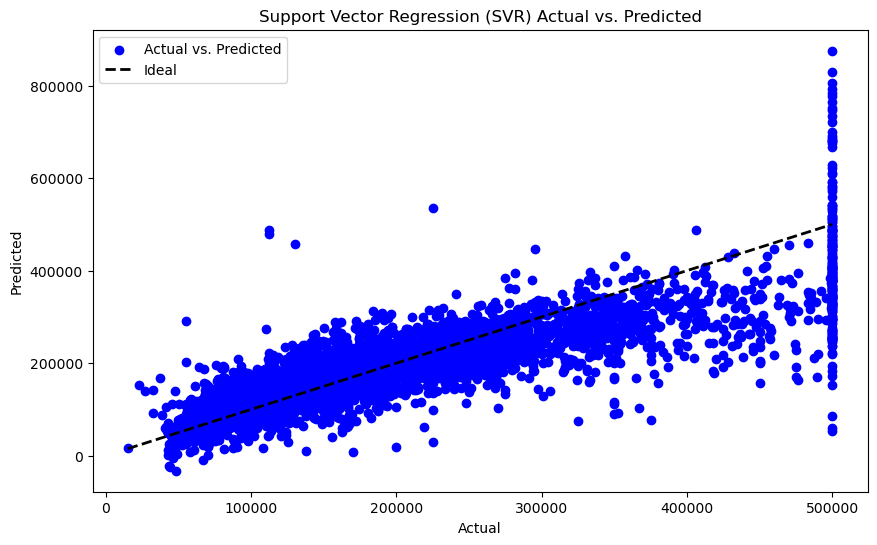

In [22]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regression (SVR) Actual vs. Predicted')
plt.legend()
plt.show()

In [23]:
#gui
from tkinter import *
from tkinter import messagebox
from PIL import ImageTk,Image
import joblib

In [24]:
joblib.dump(SVRModel,"house.joblib")

['house.joblib']

In [26]:
from tkinter import *
from tkinter import messagebox
import joblib

class HousePricePredictor:
    def __init__(self, gui):
        self.gui = gui
        gui.title("Predict House Price")
        gui.geometry("700x650")
        gui.configure(bg="lightblue")
        gui.resizable(False, False)


        self.create_widgets()

        self.SVRModel = joblib.load("house.joblib")

    def create_widgets(self):
        self.header = Label(self.gui, text="Predict House Price", font="arial 18 bold", bg="lightblue", fg="black")
        self.header.pack(pady=20)

        self.frame1 = Frame(self.gui, bg="lightblue")
        self.frame1.pack()

        labels = ["Longitude:", "Latitude:", "Housing Median Age:", "Total Rooms:", "Total Bedrooms:",
                  "Population:", "Households:", "Median Income:", "ocean_proximity"]
        self.entries = []

        for i, label_text in enumerate(labels):
            label = Label(self.frame1, text=label_text, font= 12, bg="lightblue", fg="black")
            label.grid(row=i, column=0, padx=10, pady=10)

            entry = Entry(self.frame1, bg="gray", fg="white")
            entry.grid(row=i, column=1, padx=10, pady=10)
            self.entries.append(entry)
            entry.bind("<Down>", lambda event, index=i: self.move_focus(event, index))
            entry.bind("<Up>", lambda event, index=i: self.move_focus(event, index))

        self.predict_button = Button(self.gui, text="Predict", width=10, height=3, command=self.predict_house_price)
        self.predict_button.place(x=150,y=550)
        self.clear_button = Button(self.gui, text="Clear", width=10, height=3 ,command=self.clear_entries)
        self.clear_button.place(x=450,y=550)

    def predict_house_price(self):
        features = [float(entry.get()) for entry in self.entries[:-1]]  
        ocean_proximity = self.entries[-1].get()
        
        if ocean_proximity not in ["1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]:
            messagebox.showerror("Error", "Invalid ocean_proximity value")
            return

        ocean_proximity_mapping = {"1H OCEAN": 0, "INLAND": 1, "NEAR OCEAN": 2, "NEAR BAY": 3, "ISLAND": 4}
        features.append(ocean_proximity_mapping[ocean_proximity])

        prediction = self.SVRModel.predict([features])
        messagebox.showinfo("Prediction Result", f"Predicted Price: {prediction}")
    def clear_entries(self):
        for entry in self.entries:
            entry.delete(0, END)
    def move_focus(self, event, index):
        if event.keysym == 'Down':
            index = (index + 1) % len(self.entries)
        elif event.keysym == 'Up':
            index = (index - 1) % len(self.entries)
        self.entries[index].focus_set()

if __name__ == "__main__":
    root = Tk()
    app = HousePricePredictor(root)
    root.mainloop()


C:\Users\bebo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
